In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

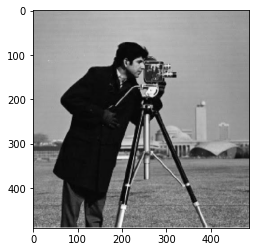

In [5]:
img_1 = plt.imread("cameraman.jpg")
plt.imshow(img_1)

In [22]:
def convert_rgb_gray_level(img):
    m =img.shape[0]
    n =img.shape[1]
    im_1 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_1[i,j]=get_distance(img[i,j,:])
    return im_1

def get_distance(v, w=[1/3,1/3,1/3]):
    a,b,c = v[0], v[1], v[2]
    w1,w2,w3 = w[0], w[1], w[2]
    d = ((a**2)*w1 +
         (b**2)*w2 +
         (c**2)*w3)**.5
    return int(d)

def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

def get_median_for_5x5(poi):
    s_1 = poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]

def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]

def get_mean_filter_for_5x5(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            # im_2[i,j]=apply_mask(poi)
            im_2[i,j] = get_median_for_5x5(poi)
    return im_2

def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            # im_2[i,j]=apply_mask(poi)
            im_2[i,j] = get_median(poi)
    return im_2    

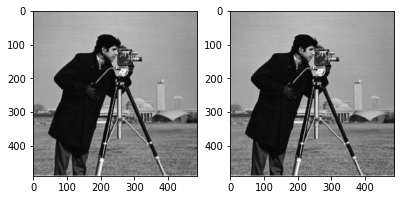

In [10]:
im_2 = convert_rgb_gray_level(img_1)
#im_3 = convert_rgb_gray_level
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_1)
plt.subplot(1,3,2)
plt.imshow(im_2, cmap="gray")
#plt.subplot(1,3,3)
#plt.imshow(im_3)

In [16]:
im_5x5 = get_mean_filter_for_5x5(im_2)

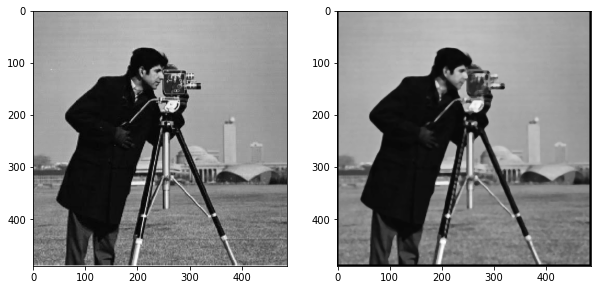

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im_2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(im_5x5, cmap="gray")
#her piksel çevrsindeki piksellerin ortalaması alarak hesaplanıyor

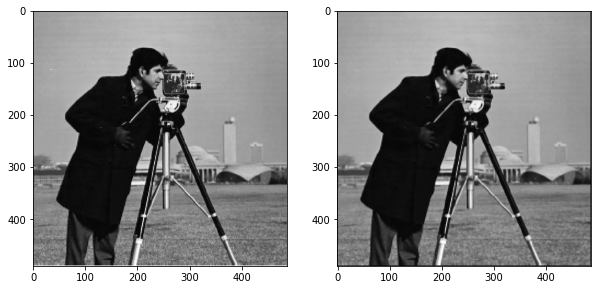

In [23]:
im_3x3 = get_mean_filter(im_2)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im_2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(im_3x3, cmap="gray")
#her piksel çevrsindeki piksellerin ortalaması alarak hesaplanıyor